# Appendix D: Data visualizations

## Global water stress index

Water stress, an indicator used by FAO, represents

> the ratio between total freshwater withdrawn by major economic sectors and total renewable freshwater resources, after taking into account environmental water requirements

Source: https://www.fao.org/sustainable-development-goals/indicators/642/en/

In [38]:
import numpy as np
import pandas as pd

# Plotly choropleth map documentation:
# https://plotly.com/python/choropleth-maps/
import plotly.express as px

# Data source:
# https://www.fao.org/fileadmin/user_upload/faoweb/statistics/SDG/April_2022/6.4.2_Level_of_Water_Stress.xlsx
# the first sheet in the provided XSLX file was manually converted to CSV

# Load CSV into data frame
df_water_stress_index = pd.read_csv("datasets/6.4.2_Level_of_Water_Stress.csv")

# Select only rows for total water index 
df_wsi_total = df_water_stress_index[df_water_stress_index["Activity"] == "TOTAL"]

# Column variables
col_time_period = "TimePeriod"
col_country_code = "ISOalpha3"
col_wsi = "Value"
col_country_name = "GeoAreaName"

In [39]:
def plot_wsi(df):  
    """
    Plot a world map of Water Stress Index.
    Accepts a Pandas dataframe organized as in the first sheet of:
    # https://www.fao.org/fileadmin/user_upload/faoweb/statistics/SDG/April_2022/6.4.2_Level_of_Water_Stress.xlsx
    """
    fig = px.choropleth(df,
        locations=col_country_code,
        color = np.log10(df[col_wsi]), # water stress index (log10)
        hover_name = col_country_name, # hover information
        color_continuous_scale = px.colors.sequential.Plasma,
        title = "Water Stress Index {}".format(df[col_time_period].min())
    )
    
    fig.update_layout(coloraxis_colorbar=dict(
        tickvals=[np.log10(df[col_wsi]).min(),
                  np.log10(1),
                  np.log10(100),
                  np.log10(1000),
                  np.log10(df[col_wsi]).max()],
        ticktext=[df[col_wsi].min(),
                  1,
                  100,
                  1000,
                  df[col_wsi].max()],
        title="Index"
    ))
    
    fig.show()

We plotted data for year 2019 and data for year 2000 to get a sense of water stress range.

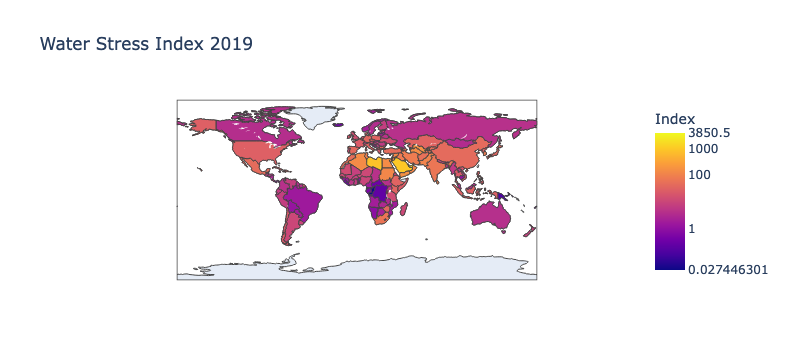

In [36]:
# Select year 2019
df_wsi_latest =  df_wsi_total[df_wsi_total[col_time_period] == 2019]
plot_wsi(df_wsi_latest)

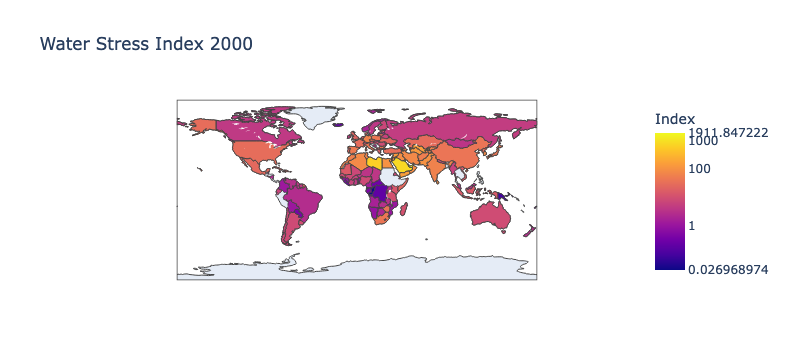

In [37]:
# Select year 2000
df_wsi_prev =  df_wsi_total[df_wsi_total[col_time_period] == 2000]
plot_wsi(df_wsi_prev)

By comparing the maximum Water Stress values for years 2019 and 2000, one can notice an increase in extreme values (above 1000%).

We then decided to focus on Algeria, as this country was targeted by the Foggaras project mentioned in the first interview (see *Appendix C*).

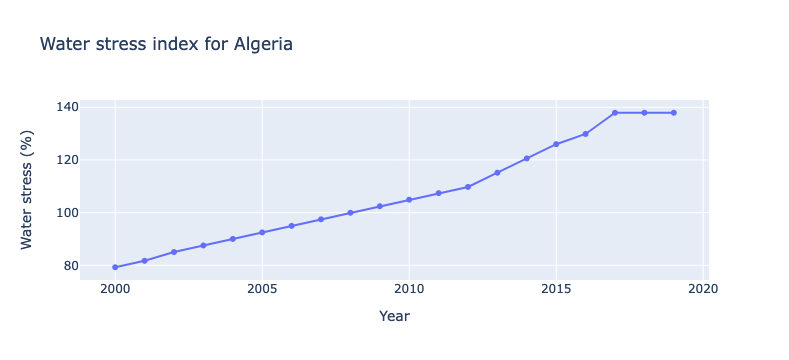

In [48]:
# Select Algeria
df_wsi_algeria =  df_wsi_total[df_wsi_total[col_country_code] == "DZA"]

# Plot Algeria's WSI by year
fig = px.line(df_wsi_algeria,
    x = col_time_period,
    y = col_wsi,
    title = 'Water stress index for Algeria',
    markers = True)
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Water stress (%)')
fig.show()

One can notice how water stress values have been increasing steadily in the period 2000-2017, crossing the threshold of 100% in 2009. For years 2018-2019 a plateau can be observed.